### Task 6: Model Tuning

● Use parameters like:
- max_depth
- min_samples_split

● Show how performance changes.

● Plot training vs testing accuracy to visualize overfitting.

In [2]:
# Load data

import pandas as pd
from sklearn.model_selection import train_test_split

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

data['Age'] = data['Age'].fillna(data['Age'].median())
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].fillna('S')
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)


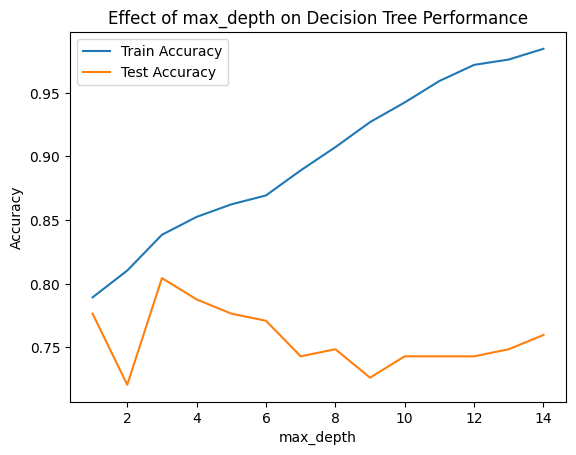

In [4]:
# Tuning max_depth

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_depths = range(1, 15)
train_acc = []
test_acc = []

for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=1)
    model.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

plt.plot(max_depths, train_acc, label='Train Accuracy')
plt.plot(max_depths, test_acc, label='Test Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Effect of max_depth on Decision Tree Performance')
plt.show()


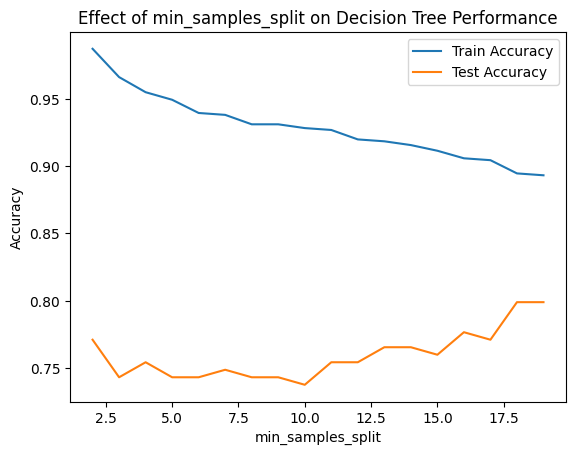

In [5]:
# Tuning min_samples_split

min_samples = range(2, 20)
train_acc_split = []
test_acc_split = []

for min_split in min_samples:
    model = DecisionTreeClassifier(min_samples_split=min_split, random_state=1)
    model.fit(X_train, y_train)
    train_acc_split.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc_split.append(accuracy_score(y_test, model.predict(X_test)))

plt.plot(min_samples, train_acc_split, label='Train Accuracy')
plt.plot(min_samples, test_acc_split, label='Test Accuracy')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Effect of min_samples_split on Decision Tree Performance')
plt.show()
